In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import os
import matplotlib.pyplot as plt

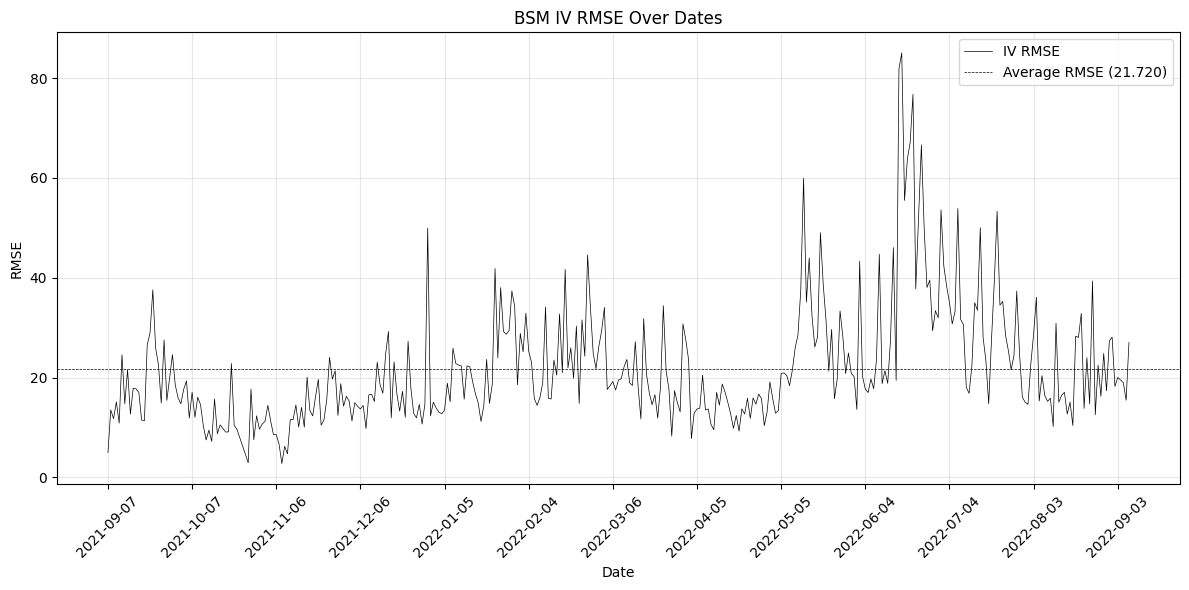

In [2]:
bs_results = pd.read_csv('/Users/joris/Documents/Master QF/Thesis/optimal-gamma-hedging/COS_Pricers/Data/ETH/Calibration/bsm_calibration_summary.csv')
avg_rmse_bs = bs_results['iv_rmse'].mean()

# Plot RMSE over the dates
plt.figure(figsize=(12, 6))
plt.plot(bs_results['date'], bs_results['iv_rmse'], linestyle='-', linewidth = 0.5, color='black', label='IV RMSE')
plt.axhline(avg_rmse_bs, color='black', linestyle='--', label=f'Average RMSE ({avg_rmse_bs:.3f})', linewidth = 0.5)
plt.xlabel('Date')
plt.ylabel('RMSE')
plt.title('BSM IV RMSE Over Dates')
plt.xticks(ticks=range(0, len(bs_results), 30), labels=bs_results['date'].iloc[::30], rotation=45)
plt.grid(True, linestyle='-', alpha=0.3)
plt.legend(fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()


<>:37: SyntaxWarning: invalid escape sequence '\s'
<>:49: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\s'
<>:37: SyntaxWarning: invalid escape sequence '\s'
<>:49: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\s'
/var/folders/j1/sv4t8szd51jgm826w2bv1vyr0000gn/T/ipykernel_78241/1640484122.py:37: SyntaxWarning: invalid escape sequence '\s'
  axes[0].set_title('Volatility parameter $\sigma$', fontsize=10)
/var/folders/j1/sv4t8szd51jgm826w2bv1vyr0000gn/T/ipykernel_78241/1640484122.py:49: SyntaxWarning: invalid escape sequence '\m'
  axes[2].set_title('Mean jump size $\mu_J$', fontsize=10)
/var/folders/j1/sv4t8szd51jgm826w2bv1vyr0000gn/T/ipykernel_78241/1640484122.py:55: SyntaxWarning: invalid escape sequence '\s'
  axes[3].set_title('Jump volatility $\sigma_J$', fontsize=10)


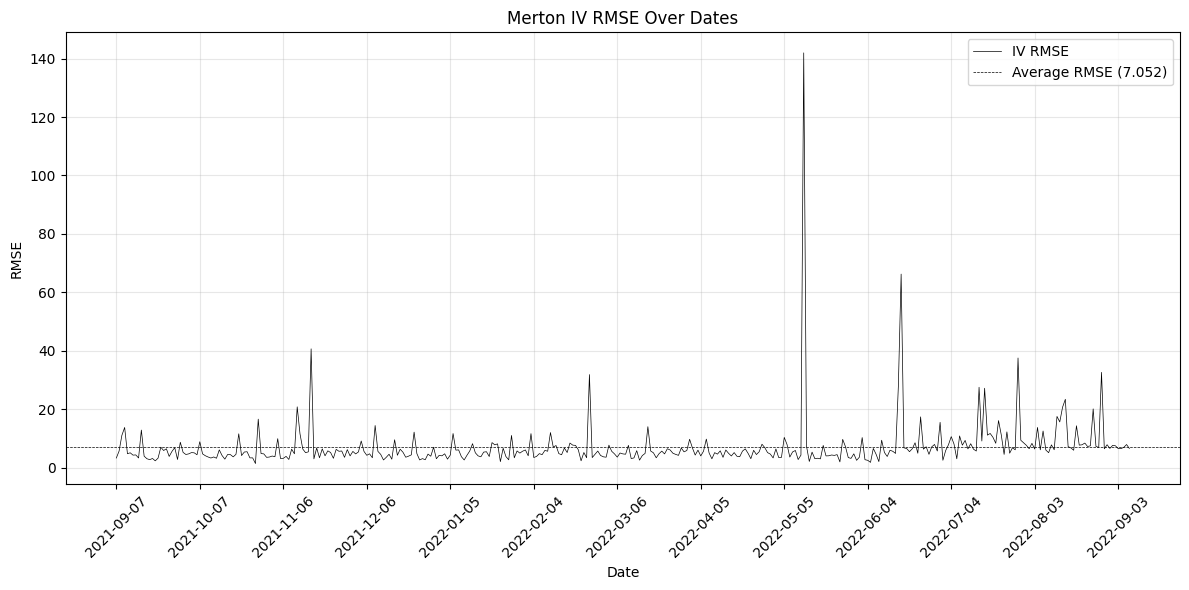

Average sigma: 0.7629, Median σ: 0.7471
Average xi: 40.1138, Median λ: 44.6221
Average muJ: -0.0462, Median μJ: -0.0358
Average sigmaJ: 0.0601, Median σJ: 0.0565


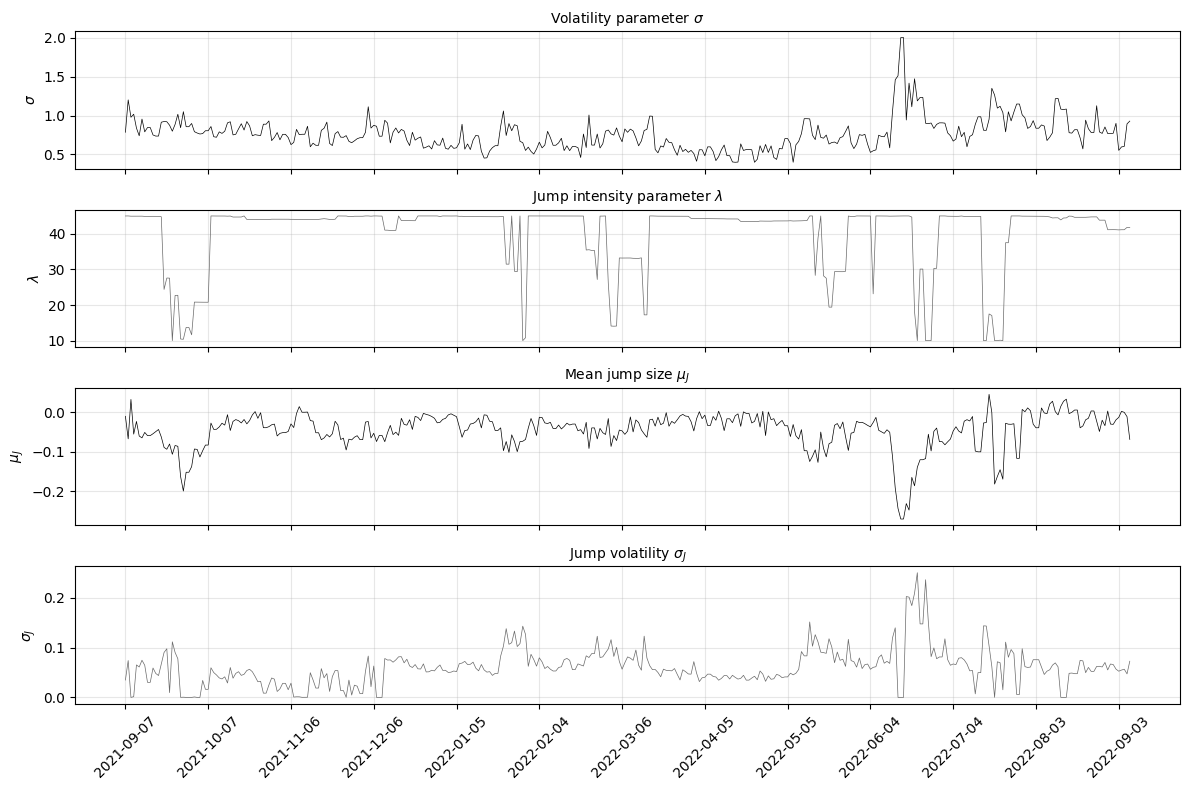

In [3]:
results_merton = pd.read_csv('/Users/joris/Documents/Master QF/Thesis/optimal-gamma-hedging/COS_Pricers/Data/ETH/Calibration/merton_calibration_summary.csv')
avg_rmse_merton = results_merton['iv_rmse'].mean()

# Plot RMSE over the dates
plt.figure(figsize=(12, 6))
plt.plot(results_merton['date'], results_merton['iv_rmse'], linestyle='-', linewidth = 0.5, color='black', label='IV RMSE')
plt.axhline(avg_rmse_merton, color='black', linestyle='--', linewidth = 0.5, label=f'Average RMSE ({avg_rmse_merton:.3f})')
plt.xlabel('Date')
plt.ylabel('RMSE')
plt.title('Merton IV RMSE Over Dates')
plt.xticks(ticks=range(0, len(results_merton), 30), labels=results_merton['date'].iloc[::30], rotation=45)
plt.grid(True, linestyle='-', alpha=0.3)
plt.legend(fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

# Extract relevant series
dates = results_merton['date']
theta_sigma = results_merton['theta_sigma']
theta_xi = results_merton['theta_xi']
theta_muJ = results_merton['theta_muJ']
theta_sigmaJ = results_merton['theta_sigmaJ']
rmse = results_merton['iv_rmse']

# Print the average and median values of the parameters
print(f'Average sigma: {theta_sigma.mean():.4f}, Median σ: {theta_sigma.median():.4f}')
print(f'Average xi: {theta_xi.mean():.4f}, Median λ: {theta_xi.median():.4f}')
print(f'Average muJ: {theta_muJ.mean():.4f}, Median μJ: {theta_muJ.median():.4f}')
print(f'Average sigmaJ: {theta_sigmaJ.mean():.4f}, Median σJ: {theta_sigmaJ.median():.4f}')
print
# Create figure with 5 subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 8), sharex=True)

# Plot theta_σ
axes[0].plot(dates, theta_sigma, color='black', linewidth=0.5)
axes[0].set_ylabel(r'$\sigma$', fontsize=10)
axes[0].set_title('Volatility parameter $\sigma$', fontsize=10)
axes[0].grid(True, linestyle='-', alpha=0.3)

# Plot theta_ξ
axes[1].plot(dates, theta_xi, color='dimgray', linewidth=0.5)
axes[1].set_ylabel(r'$\lambda$', fontsize=10)
axes[1].set_title(r'Jump intensity parameter $\lambda$', fontsize=10)
axes[1].grid(True, linestyle='-', alpha=0.3)

# Plot theta_μJ
axes[2].plot(dates, theta_muJ, color='black', linewidth=0.5)
axes[2].set_ylabel(r'$\mu_J$', fontsize=10)
axes[2].set_title('Mean jump size $\mu_J$', fontsize=10)
axes[2].grid(True, linestyle='-', alpha=0.3)

# Plot theta_σJ
axes[3].plot(dates, theta_sigmaJ, color='dimgray', linewidth=0.5)
axes[3].set_ylabel(r'$\sigma_J$', fontsize=10)
axes[3].set_title('Jump volatility $\sigma_J$', fontsize=10)
axes[3].grid(True, linestyle='-', alpha=0.3)

# Format x-axis ticks
plt.xticks(ticks=range(0, len(dates), 30), labels=dates.iloc[::30], rotation=45)
plt.tight_layout()
plt.show()

Empty DataFrame
Columns: [date, model, theta_sigma, theta_xi, theta_alpha1, theta_alpha2, theta_p1, iv_rmse, n_strk, success, message]
Index: []


<>:51: SyntaxWarning: invalid escape sequence '\s'
<>:57: SyntaxWarning: invalid escape sequence '\l'
<>:51: SyntaxWarning: invalid escape sequence '\s'
<>:57: SyntaxWarning: invalid escape sequence '\l'
/var/folders/j1/sv4t8szd51jgm826w2bv1vyr0000gn/T/ipykernel_78241/1756673091.py:51: SyntaxWarning: invalid escape sequence '\s'
  axes[0].set_title('Volatility $\sigma$', fontsize=10)
/var/folders/j1/sv4t8szd51jgm826w2bv1vyr0000gn/T/ipykernel_78241/1756673091.py:57: SyntaxWarning: invalid escape sequence '\l'
  axes[1].set_title('Jump intensity $\lambda$', fontsize=10)


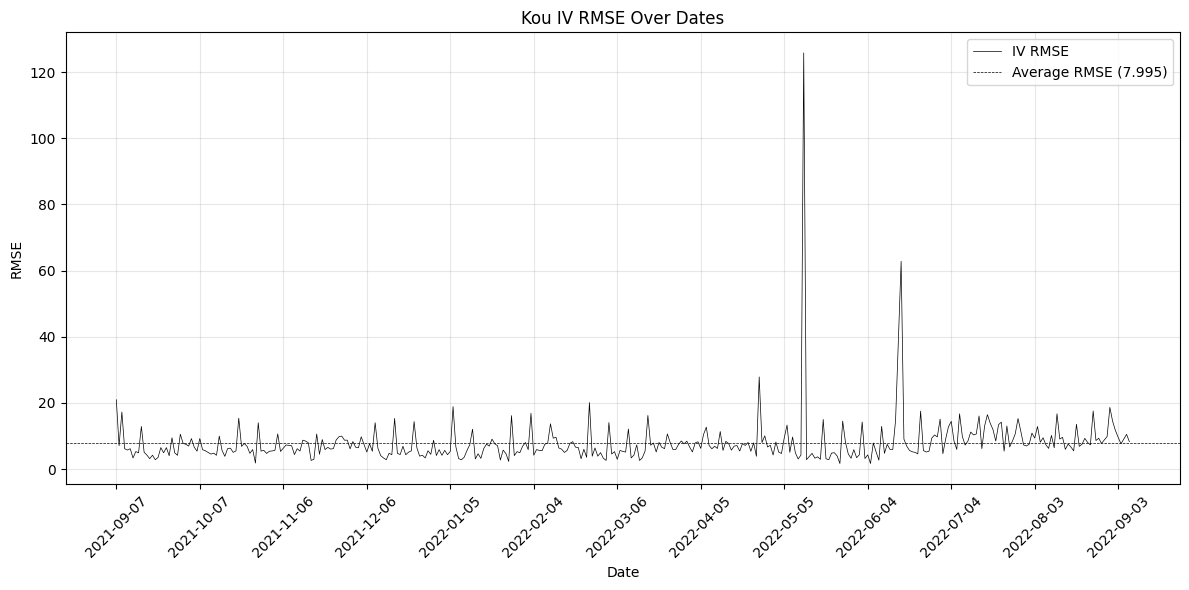

Average sigma: 0.7964, Median sigma: 0.7777
Average lambda: 55.8052, Median lambda: 59.8642
Average alpha1: 26.1198, Median alpha1: 24.6372
Average alpha2: 27.7438, Median alpha2: 27.5082
Average p1: 0.1832, Median p₁: 0.0624


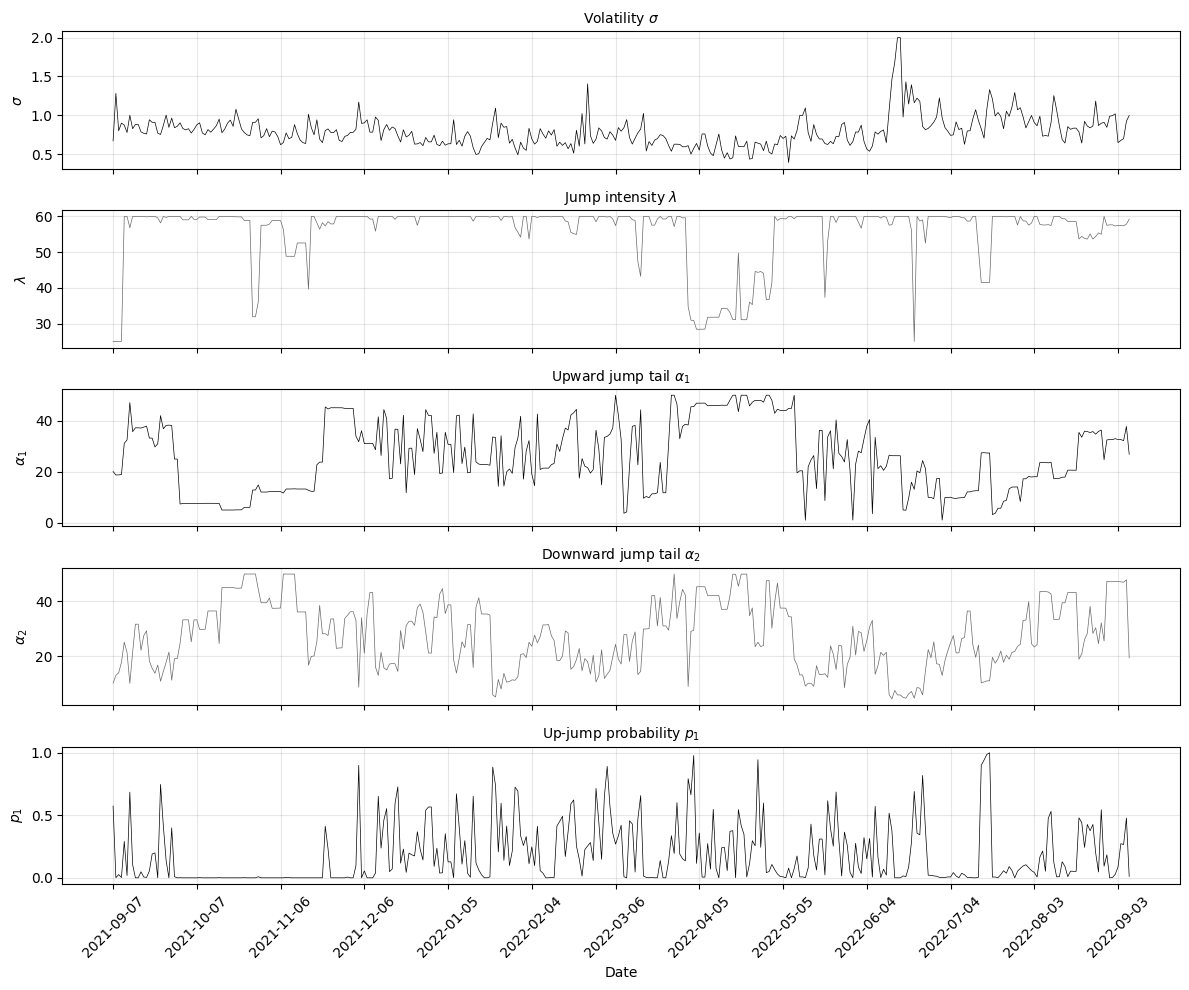

In [4]:
results_kou = pd.read_csv('/Users/joris/Documents/Master QF/Thesis/optimal-gamma-hedging/COS_Pricers/Data/ETH/Calibration/kou_calibration_summary.csv')

# Get mask where RMSE < 100
# mask = results_kou['iv_rmse'] < 100
# count_high_rmse_kou = results_kou[~mask].shape[0]
# print(f'Number of dates with RMSE > 100: {count_high_rmse_kou}')
# results_kou = results_kou[mask]

avg_relative_rmse_kou = (results_kou['iv_rmse'] / bs_results['iv_rmse']).mean()
avg_rmse_kou = results_kou['iv_rmse'].mean()


# Give dates where iv_rmse is nan or 0
wrong_results_kou = results_kou[results_kou['iv_rmse'].isna() | (results_kou['iv_rmse'] == 0)]
print(wrong_results_kou)

# Plot RMSE over the dates
plt.figure(figsize=(12, 6))
plt.plot(results_kou['date'], results_kou['iv_rmse'], linestyle='-', color='black', label='IV RMSE', linewidth=0.5)
plt.axhline(avg_rmse_kou, color='black', linestyle='--', linewidth=0.5, label=f'Average RMSE ({avg_rmse_kou:.3f})')
plt.xlabel('Date')
plt.ylabel('RMSE')
plt.title('Kou IV RMSE Over Dates')
plt.xticks(ticks=range(0, len(results_kou), 30), labels=results_kou['date'].iloc[::30], rotation=45)
plt.grid(True, linestyle='-', alpha=0.3)
plt.legend(fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

# Create figure with 5 subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 10), sharex=True)

dates = results_kou['date']
sigma = results_kou['theta_sigma']
xi = results_kou['theta_xi']
alpha1 = results_kou['theta_alpha1']  
alpha2 = results_kou['theta_alpha2'] 
p1 = results_kou['theta_p1']
rmse = results_kou['iv_rmse']

# Print the average and median values of the parameters
print(f'Average sigma: {sigma.mean():.4f}, Median sigma: {sigma.median():.4f}')
print(f'Average lambda: {xi.mean():.4f}, Median lambda: {xi.median():.4f}')
print(f'Average alpha1: {alpha1.mean():.4f}, Median alpha1: {alpha1.median():.4f}')
print(f'Average alpha2: {alpha2.mean():.4f}, Median alpha2: {alpha2.median():.4f}')
print(f'Average p1: {p1.mean():.4f}, Median p₁: {p1.median():.4f}')

# σ
axes[0].plot(dates, sigma, color='black', linewidth=0.5)
axes[0].set_ylabel(r'$\sigma$')
axes[0].set_title('Volatility $\sigma$', fontsize=10)
axes[0].grid(True, linestyle='-', alpha=0.3)

# ξ
axes[1].plot(dates, xi, color='dimgray', linewidth=0.5)
axes[1].set_ylabel(r'$\lambda$')
axes[1].set_title('Jump intensity $\lambda$', fontsize=10)
axes[1].grid(True, linestyle='-', alpha=0.3)

# α₁
axes[2].plot(dates, alpha1, color='black', linewidth=0.5)
axes[2].set_ylabel(r'$\alpha_1$')
axes[2].set_title(r'Upward jump tail $\alpha_1$', fontsize=10) 
axes[2].grid(True, linestyle='-', alpha=0.3)

# α₂
axes[3].plot(dates, alpha2, color='dimgray', linewidth=0.5)
axes[3].set_ylabel(r'$\alpha_2$')
axes[3].set_title(r'Downward jump tail $\alpha_2$', fontsize=10)  # <- fixed
axes[3].grid(True, linestyle='-', alpha=0.3)

# p₁
axes[4].plot(dates, p1, color='black', linewidth=0.5)
axes[4].set_ylabel(r'$p_1$')
axes[4].set_title('Up-jump probability $p_1$', fontsize=10)
axes[4].set_xlabel('Date')
axes[4].grid(True, linestyle='-', alpha=0.3)

# Format x-axis ticks
plt.xticks(ticks=range(0, len(dates), 30), labels=dates.iloc[::30], rotation=45)
plt.tight_layout()
plt.show()


<>:50: SyntaxWarning: invalid escape sequence '\g'
<>:50: SyntaxWarning: invalid escape sequence '\g'
/var/folders/j1/sv4t8szd51jgm826w2bv1vyr0000gn/T/ipykernel_78241/3793652987.py:50: SyntaxWarning: invalid escape sequence '\g'
  axes[2].set_title('Volatility of variance $\gamma$', fontsize=10)


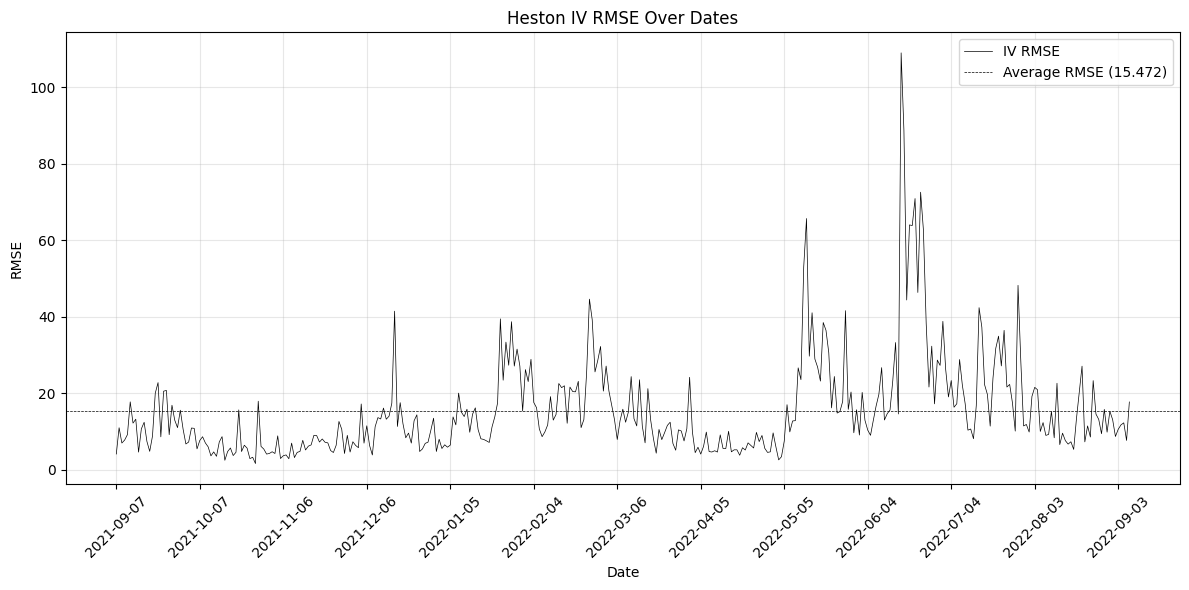

Average v0: 0.7577, Median v0: 0.6402
Average vbar: 6.7469, Median vbar: 7.0000
Average kappa: 0.3000, Median kappa: 0.3000
Average gamma: 14.5850, Median gamma: 15.0000
Average rho: -0.3465, Median rho: -0.3082


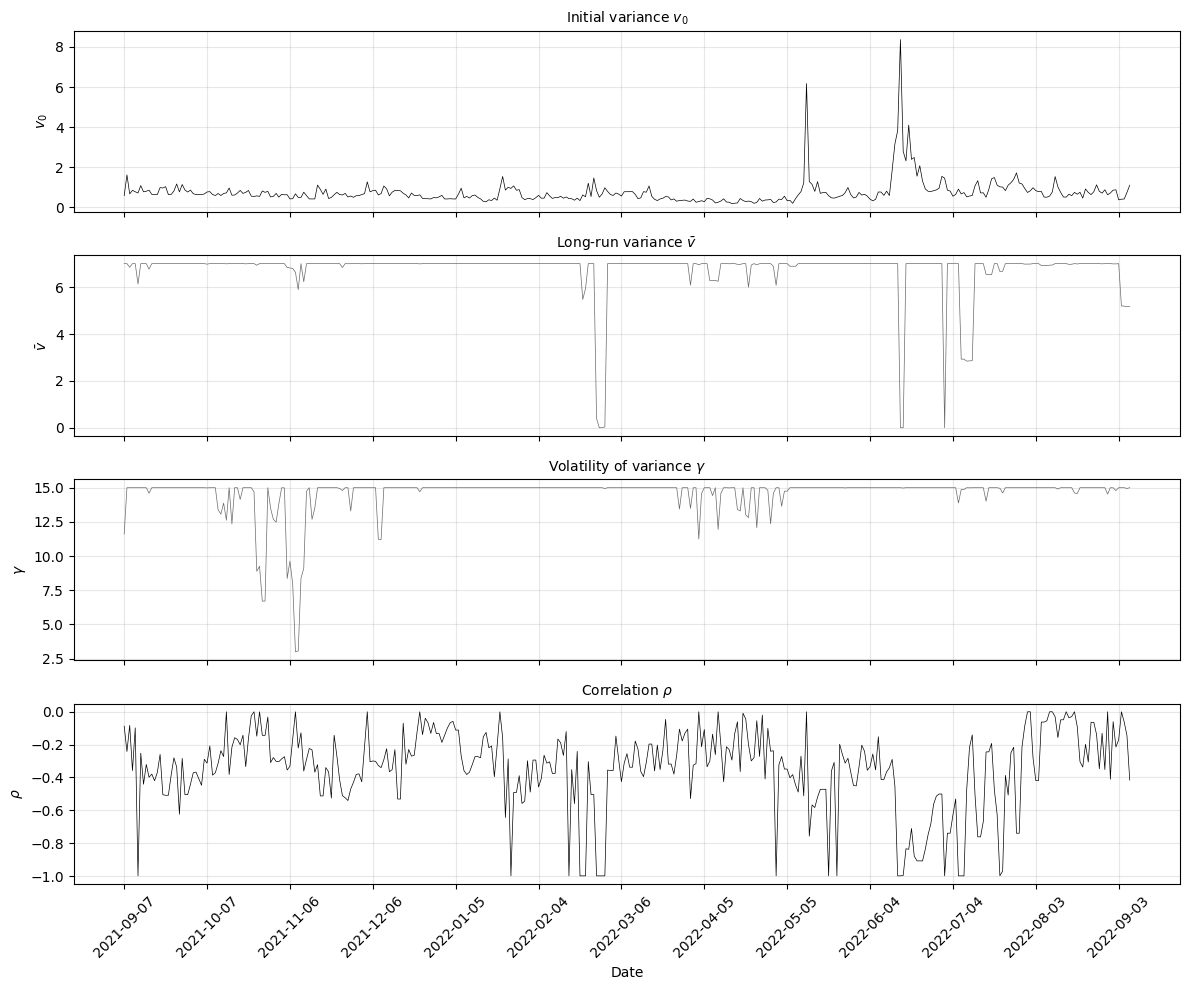

In [5]:
results_heston = pd.read_csv('/Users/joris/Documents/Master QF/Thesis/optimal-gamma-hedging/COS_Pricers/Data/ETH/Calibration/heston_calibration_summary.csv')
avg_rmse_heston = results_heston['iv_rmse'].mean()

# v0, v_bar, kappa, gamma, rho
# Plot RMSE over the dates
plt.figure(figsize=(12, 6))
plt.plot(results_heston['date'], results_heston['iv_rmse'], linestyle='-', linewidth = 0.5, color='black', label='IV RMSE')
plt.axhline(avg_rmse_heston, color='black', linestyle='--', linewidth = 0.5, label=f'Average RMSE ({avg_rmse_heston:.3f})')
plt.xlabel('Date')
plt.ylabel('RMSE')
plt.title('Heston IV RMSE Over Dates')
plt.xticks(ticks=range(0, len(results_heston), 30), labels=results_heston['date'].iloc[::30], rotation=45)
plt.grid(True, linestyle='-', alpha=0.3)
plt.legend(fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

# Create figure with 5 subplots for Heston parameters
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

dates = results_heston['date']
v0 = results_heston['theta_v0']
v_bar = results_heston['theta_v_bar']
kappa = results_heston['theta_kappa']
gamma = results_heston['theta_gamma']
rho = results_heston['theta_rho']

# Print the average and median values of the parameters
print(f'Average v0: {v0.mean():.4f}, Median v0: {v0.median():.4f}')
print(f'Average vbar: {v_bar.mean():.4f}, Median vbar: {v_bar.median():.4f}')
print(f'Average kappa: {kappa.mean():.4f}, Median kappa: {kappa.median():.4f}')
print(f'Average gamma: {gamma.mean():.4f}, Median gamma: {gamma.median():.4f}')
print(f'Average rho: {rho.mean():.4f}, Median rho: {rho.median():.4f}')

# v0
axes[0].plot(dates, v0, color='black', linewidth=0.5)
axes[0].set_ylabel(r'$v_0$')
axes[0].set_title(r'Initial variance $v_0$', fontsize=10)
axes[0].grid(True, linestyle='-', alpha=0.3)

# v_bar
axes[1].plot(dates, v_bar, color='dimgray', linewidth=0.5)
axes[1].set_ylabel(r'$\bar{v}$')
axes[1].set_title(r'Long-run variance $\bar{v}$', fontsize=10)
axes[1].grid(True, linestyle='-', alpha=0.3)

# gamma
axes[2].plot(dates, gamma, color='dimgray', linewidth=0.5)
axes[2].set_ylabel(r'$\gamma$')
axes[2].set_title('Volatility of variance $\gamma$', fontsize=10)
axes[2].grid(True, linestyle='-', alpha=0.3)

# rho
axes[3].plot(dates, rho, color='black', linewidth=0.5)
axes[3].set_ylabel(r'$\rho$')
axes[3].set_title(r'Correlation $\rho$', fontsize=10)
axes[3].set_xlabel('Date')
axes[3].grid(True, linestyle='-', alpha=0.3)

# # kappa
# axes[4].plot(dates, kappa, color='black', linewidth=0.5)
# axes[4].set_ylabel(r'$\kappa$')
# axes[4].set_title(r'Mean reversion speed $\kappa$', fontsize=10)
# axes[4].grid(True, linestyle='-', alpha=0.3)

# Format x-axis ticks
plt.xticks(ticks=range(0, len(dates), 30), labels=dates.iloc[::30], rotation=45)
plt.tight_layout()
plt.show()


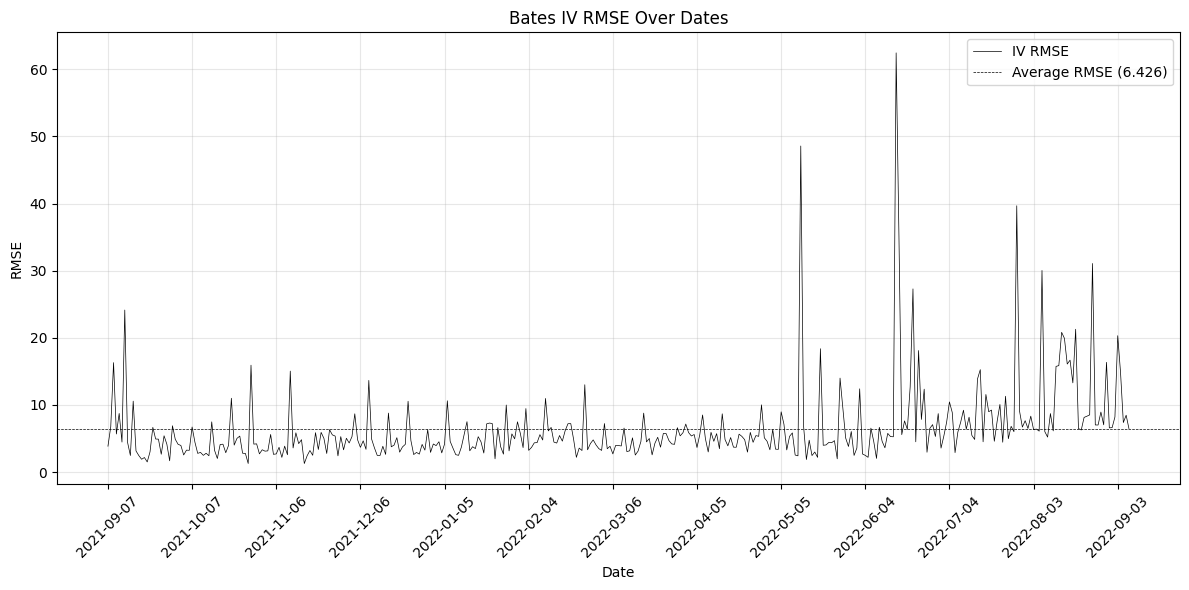

Average v0: 0.6115, Median v0: 0.5438
Average vbar: 0.4797, Median vbar: 0.2690
Average kappa: 4.9914, Median kappa: 1.2608
Average gamma: 1.3612, Median gamma: 1.9999
Average rho: 0.3851, Median rho: 0.7196
Average xi: 36.7392, Median xi: 44.8687
Average muJ: -0.0562, Median muJ: -0.0463
Average sigmaJ: 0.0615, Median sigmaJ: 0.0556


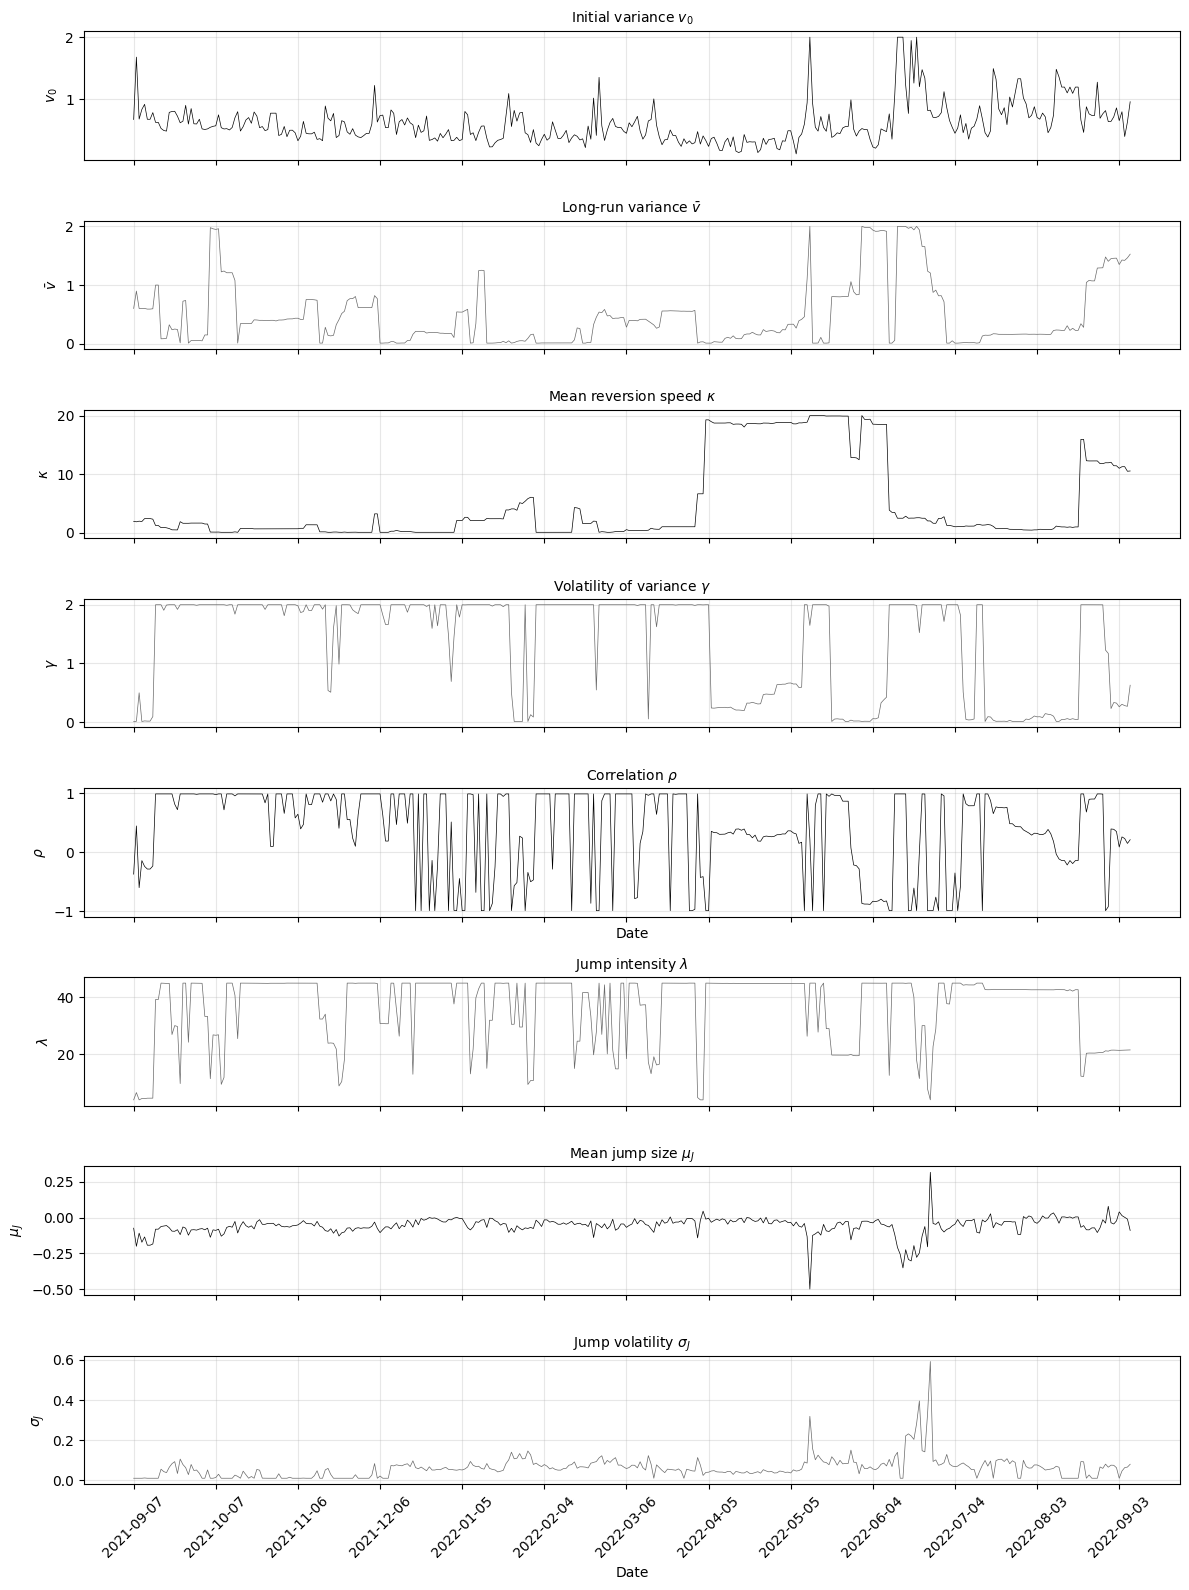

In [6]:
results_bates = pd.read_csv('/Users/joris/Documents/Master QF/Thesis/optimal-gamma-hedging/COS_Pricers/Data/ETH/Calibration/bates_calibration_summary.csv')
avg_rmse_bates = results_bates['iv_rmse'].mean()

# v0, v_bar, kappa, gamma, rho
# Plot RMSE over the dates
plt.figure(figsize=(12, 6))
plt.plot(results_bates['date'], results_bates['iv_rmse'], linestyle='-', linewidth = 0.5, color='black', label='IV RMSE')
plt.axhline(avg_rmse_bates, color='black', linestyle='--', linewidth = 0.5, label=f'Average RMSE ({avg_rmse_bates:.3f})')
plt.xlabel('Date')
plt.ylabel('RMSE')
plt.title('Bates IV RMSE Over Dates')
plt.xticks(ticks=range(0, len(results_bates), 30), labels=results_bates['date'].iloc[::30], rotation=45)
plt.grid(True, linestyle='-', alpha=0.3)
plt.legend(fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

# Use subplots to plot all Bates parameters over the dates (like previous model cells)
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(12, 16), sharex=True)

dates = results_bates['date']
v0 = results_bates['theta_v0']
vbar = results_bates['theta_vbar']
kappa = results_bates['theta_kappa']
gamma = results_bates['theta_gamma']
rho = results_bates['theta_rho']
xi = results_bates['theta_xi']
muJ = results_bates['theta_muJ']
sigmaJ = results_bates['theta_sigmaJ']

# Print the average and median values of the parameters
print(f'Average v0: {v0.mean():.4f}, Median v0: {v0.median():.4f}')
print(f'Average vbar: {vbar.mean():.4f}, Median vbar: {vbar.median():.4f}')
print(f'Average kappa: {kappa.mean():.4f}, Median kappa: {kappa.median():.4f}')
print(f'Average gamma: {gamma.mean():.4f}, Median gamma: {gamma.median():.4f}')
print(f'Average rho: {rho.mean():.4f}, Median rho: {rho.median():.4f}')
print(f'Average xi: {xi.mean():.4f}, Median xi: {xi.median():.4f}')
print(f'Average muJ: {muJ.mean():.4f}, Median muJ: {muJ.median():.4f}')
print(f'Average sigmaJ: {sigmaJ.mean():.4f}, Median sigmaJ: {sigmaJ.median():.4f}')

# v0
axes[0].plot(dates, v0, color='black', linewidth=0.5)
axes[0].set_ylabel(r'$v_0$')
axes[0].set_title(r'Initial variance $v_0$', fontsize=10)
axes[0].grid(True, linestyle='-', alpha=0.3)

# vbar
axes[1].plot(dates, vbar, color='dimgray', linewidth=0.5)
axes[1].set_ylabel(r'$\bar{v}$')
axes[1].set_title(r'Long-run variance $\bar{v}$', fontsize=10)
axes[1].grid(True, linestyle='-', alpha=0.3)

# kappa
axes[2].plot(dates, kappa, color='black', linewidth=0.5)
axes[2].set_ylabel(r'$\kappa$')
axes[2].set_title(r'Mean reversion speed $\kappa$', fontsize=10)
axes[2].grid(True, linestyle='-', alpha=0.3)

# gamma
axes[3].plot(dates, gamma, color='dimgray', linewidth=0.5)
axes[3].set_ylabel(r'$\gamma$')
axes[3].set_title(r'Volatility of variance $\gamma$', fontsize=10)
axes[3].grid(True, linestyle='-', alpha=0.3)

# rho
axes[4].plot(dates, rho, color='black', linewidth=0.5)
axes[4].set_ylabel(r'$\rho$')
axes[4].set_title(r'Correlation $\rho$', fontsize=10)
axes[4].set_xlabel('Date')
axes[4].grid(True, linestyle='-', alpha=0.3)

# plt.xticks(ticks=range(0, len(dates), 30), labels=dates.iloc[::30], rotation=45)
# plt.tight_layout()
# plt.show()

# # Additional subplots for jump parameters
# fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 6), sharex=True)

# xi
axes[5].plot(dates, xi, color='dimgray', linewidth=0.5)
axes[5].set_ylabel(r'$\lambda$')
axes[5].set_title(r'Jump intensity $\lambda$', fontsize=10)
axes[5].grid(True, linestyle='-', alpha=0.3)

# muJ
axes[6].plot(dates, muJ, color='black', linewidth=0.5)
axes[6].set_ylabel(r'$\mu_J$')
axes[6].set_title(r'Mean jump size $\mu_J$', fontsize=10)
axes[6].grid(True, linestyle='-', alpha=0.3)

# sigmaJ
axes[7].plot(dates, sigmaJ, color='dimgray', linewidth=0.5)
axes[7].set_ylabel(r'$\sigma_J$')
axes[7].set_title(r'Jump volatility $\sigma_J$', fontsize=10)
axes[7].set_xlabel('Date')
axes[7].grid(True, linestyle='-', alpha=0.3)

plt.xticks(ticks=range(0, len(dates), 30), labels=dates.iloc[::30], rotation=45)
plt.tight_layout()
plt.show()


Mean and median RMSE for each model:
Merton: 7.052119875106281 5.361245507344522
Kou: 7.995228081692406 6.548226332134351
Heston: 15.472179162821213 11.449869198527251
Bates: 6.42576824915187 4.914040695368021
BSM: 21.72028895228465 18.434241584885378
Relative RMSE (Merton, Kou, Heston, Bates):
Medians: 0.29569482125979324 0.3954312550194722 0.6273037912107524 0.27650515253401803
Means: 0.3449424375248144 0.41038539692759385 0.6471468649721664 0.3229082019653883


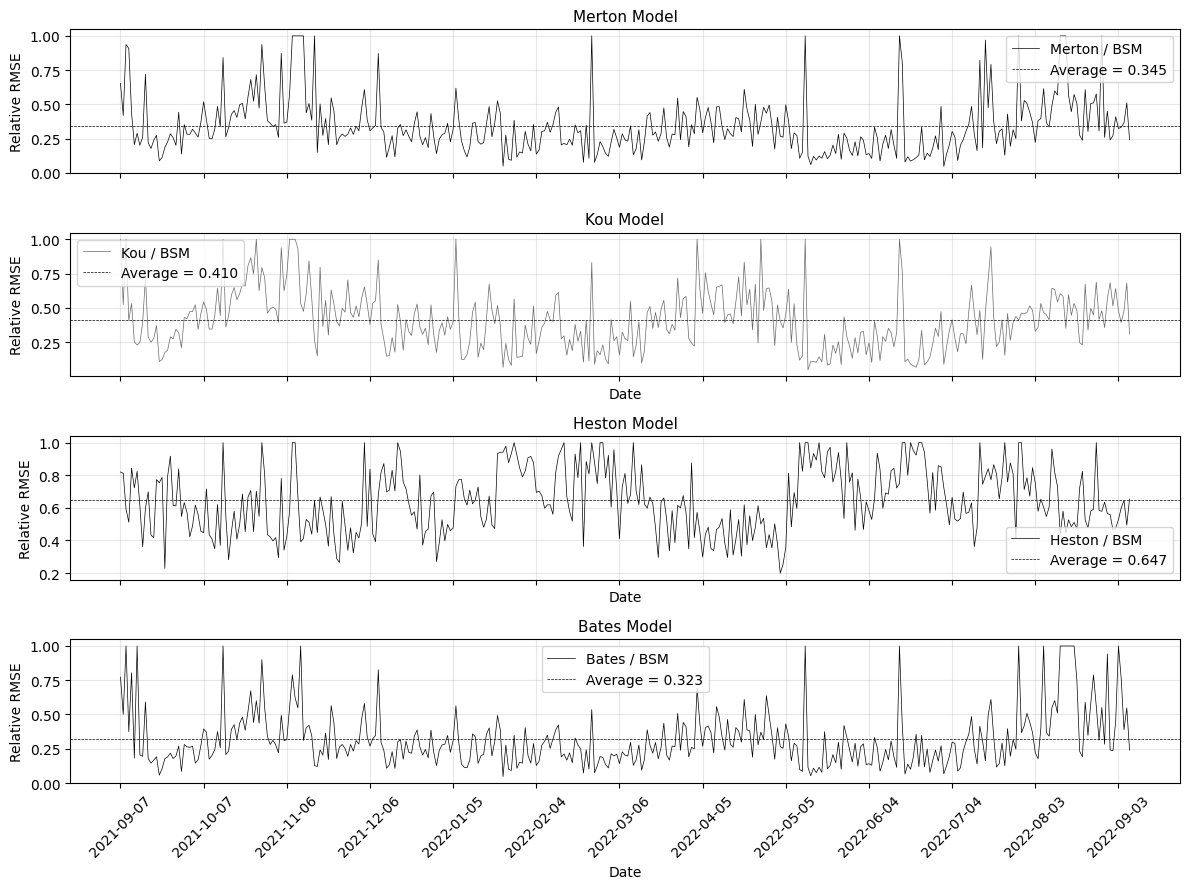

In [7]:
# Compute relative RMSE
rel_rmse_merton = np.where(results_merton['iv_rmse'] / bs_results['iv_rmse'] < 1, results_merton['iv_rmse'] / bs_results['iv_rmse'], 1)
rel_rmse_kou = np.where(results_kou['iv_rmse'] / bs_results['iv_rmse'] < 1, results_kou['iv_rmse'] / bs_results['iv_rmse'], 1)
rel_rmse_heston = np.where(results_heston['iv_rmse'] / bs_results['iv_rmse'] < 1, results_heston['iv_rmse'] / bs_results['iv_rmse'], 1)
rel_rmse_bates = np.where(results_bates['iv_rmse'] / bs_results['iv_rmse'] < 1, results_bates['iv_rmse'] / bs_results['iv_rmse'], 1)

print("Mean and median RMSE for each model:")
print("Merton:", results_merton['iv_rmse'].mean(), results_merton['iv_rmse'].median())
print("Kou:", results_kou['iv_rmse'].mean(), results_kou['iv_rmse'].median())
print("Heston:", results_heston['iv_rmse'].mean(), results_heston['iv_rmse'].median())
print("Bates:", results_bates['iv_rmse'].mean(), results_bates['iv_rmse'].median())
print("BSM:", bs_results['iv_rmse'].mean(), bs_results['iv_rmse'].median())

print("Relative RMSE (Merton, Kou, Heston, Bates):")
print("Medians:", np.median(rel_rmse_merton), np.median(rel_rmse_kou), np.median(rel_rmse_heston), np.median(rel_rmse_bates))
print("Means:", rel_rmse_merton.mean(), rel_rmse_kou.mean(), rel_rmse_heston.mean(), rel_rmse_bates.mean())

# Create the subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 9), sharex=True)

# Merton subplot (now first)
axes[0].plot(results_merton['date'], rel_rmse_merton, linestyle='-', color='black', linewidth=0.5, label='Merton / BSM')
axes[0].axhline(rel_rmse_merton.mean(), color='black', linestyle='--', linewidth=0.5, label=f'Average = {rel_rmse_merton.mean():.3f}')
axes[0].set_ylabel('Relative RMSE')
axes[0].set_title('Merton Model', fontsize=11)
axes[0].grid(True, linestyle='-', alpha=0.3)
axes[0].legend()

# Kou subplot
axes[1].plot(results_kou['date'], rel_rmse_kou, linestyle='-', color='dimgray', linewidth=0.5, label='Kou / BSM')
axes[1].axhline(rel_rmse_kou.mean(), color='black', linestyle='--', linewidth=0.5, label=f'Average = {rel_rmse_kou.mean():.3f}')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Relative RMSE')
axes[1].set_title('Kou Model', fontsize=11)
axes[1].grid(True, linestyle='-', alpha=0.3)
axes[1].legend()

# Heston subplot
axes[2].plot(results_heston['date'], rel_rmse_heston, linestyle='-', color='black', linewidth=0.5, label='Heston / BSM')
axes[2].axhline(rel_rmse_heston.mean(), color='black', linestyle='--', linewidth=0.5, label=f'Average = {rel_rmse_heston.mean():.3f}')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Relative RMSE')
axes[2].set_title('Heston Model', fontsize=11)
axes[2].grid(True, linestyle='-', alpha=0.3)
axes[2].legend()

# Bates subplot
axes[3].plot(results_bates['date'], rel_rmse_bates, linestyle='-', color='black', linewidth=0.5, label='Bates / BSM')
axes[3].axhline(rel_rmse_bates.mean(), color='black', linestyle='--', linewidth=0.5, label=f'Average = {rel_rmse_bates.mean():.3f}')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Relative RMSE')
axes[3].set_title('Bates Model', fontsize=11)
axes[3].grid(True, linestyle='-', alpha=0.3)
axes[3].legend()

# Improve layout
plt.xticks(ticks=range(0, len(results_merton), 30), labels=results_merton['date'].iloc[::30], rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load main options data from the specified file path
options_file = "/Users/joris/Documents/Master QF/Thesis/optimal-gamma-hedging/COS_Pricers/Data/ETH/Options/main_per_option_fits.csv"
df = pd.read_csv(options_file, parse_dates=["timestamp"])

# Prepare a standardized date column
df["date"] = pd.to_datetime(df["timestamp"].dt.date)

# Standardize IV columns to decimal format (e.g., 25.0 -> 0.25)
iv_cols = [c for c in df.columns if c.endswith("_iv")]
for c in iv_cols:
    if c in df and np.nanmedian(df[c]) > 1.0:
        df[c] /= 100.0

# Define the models for the analysis
models = {
    "BSM": "bsm_fitted_iv", "Merton": "merton_fitted_iv", "Kou": "kou_fitted_iv",
    "Heston": "heston_fitted_iv", "Bates": "bates_fitted_iv",
}

# --- 2. ANALYSIS 1: RMSE by Moneyness (with combined ATM) ---

print("--- Analysis 1: RMSE by Moneyness Class (Vol Points) ---")

# Define a combined analysis category for moneyness
df['type'] = df.get('opt_type', df.get('type')).str.capitalize() # Handle 'opt_type' or 'type' column

def create_analysis_class(row):
    mc, t = row['moneyness_class'], row['type']
    if mc == 'ATM':
        return 'At-the-Money'
    if mc in ['OTM', 'DOTM']:
        return f"{mc} ({t})"
    return mc

df['analysis_class'] = df.apply(create_analysis_class, axis=1)

# Calculate average RMSE for each analysis class
rows_moneyness = []
for analysis_cls, g in df.groupby("analysis_class"):
    row = {"analysis_class": analysis_cls}
    for name, col in models.items():
        m = g[["mark_iv", col]].dropna()
        row[name] = np.sqrt(np.mean((m[col] - m["mark_iv"])**2)) if len(m) > 0 else np.nan
    rows_moneyness.append(row)

# Format the results into a table
results_moneyness = pd.DataFrame(rows_moneyness).set_index('analysis_class')
results_moneyness_volpts = (results_moneyness * 100).round(3)

# Define a logical order for the table rows and sort
order_moneyness = [
    'DOTM (Call)', 'OTM (Call)', 'DOTM (Put)', 'OTM (Put)', 'At-the-Money'
]
results_moneyness_volpts = results_moneyness_volpts.reindex(order_moneyness).dropna(how='all')
print(results_moneyness_volpts)
print("\n" + "="*60 + "\n")


# --- 3. ANALYSIS 2: RMSE by Volatility Quantile ---

print("--- Analysis 2: RMSE by Volatility Quantile (Vol Points) ---")

# Calculate the mean mark_iv for each day from ATM options
atm_df = df[df['moneyness_class'] == 'ATM'].copy()
daily_atm_iv = atm_df.groupby('date')['mark_iv'].mean().rename('daily_atm_iv')
df = pd.merge(df, daily_atm_iv, on='date', how='left')

# Create 5 volatility quintiles using the daily ATM IV
df.dropna(subset=['daily_atm_iv'], inplace=True)
df['vol_quantile'] = pd.qcut(
    df['daily_atm_iv'],
    q=5,
    labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4', 'Q5 (High)'],
    duplicates='drop'
)

# Calculate RMSE, grouping only by the new volatility quintile
rows_vol = []
for vol_q, g in df.groupby("vol_quantile"):
    row = {"vol_quantile": vol_q}
    for name, col in models.items():
        m = g[["mark_iv", col]].dropna()
        row[name] = np.sqrt(np.mean((m[col] - m["mark_iv"])**2)) if len(m) > 0 else np.nan
    rows_vol.append(row)

# Create a DataFrame from the results
results_vol = pd.DataFrame(rows_vol).set_index('vol_quantile')

# Transpose and format the final table
final_table_vol = results_vol.transpose()
final_table_volpts = (final_table_vol * 100).round(3)

# Add a ratio row for comparison (e.g., Bates / BSM)
if 'Bates' in final_table_volpts.index and 'BSM' in final_table_volpts.index:
    ratio = final_table_volpts.loc['Bates'] / final_table_volpts.loc['BSM']
    ratio.name = 'Bates/BSM'
    final_table_volpts = pd.concat([final_table_volpts, ratio.to_frame().T])

print(final_table_volpts)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/joris/Documents/Master QF/Thesis/optimal-gamma-hedging/COS_Pricers/Data/ETH/Options/main_per_option_fits.csv'